In [1]:
# Import Libraries
import pandas as pd 
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway,ttest_ind
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import statsmodels.api as sm
from statsmodels.formula.api import ols
 

%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12,8) 

# Reading the data
df = pd.read_csv(r'C:\Users\vikas\Downloads\archive (1)\movies.csv')

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [4]:
# Let's see if there is any missing data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# Dropping Missing Values
df.dropna(inplace= True)

In [6]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [7]:
# Data Type
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
#change data type of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [9]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [11]:
#create correct year column
df['yearcorrect']=df['released'].str.extract(pat= '([0-9]{4})').astype(int)
df.sort_values(by=['gross'], inplace = False,ascending= False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [12]:
#Drop any Duplicates
df['company'].drop_duplicates().sort_values(ascending=False)
#to drop all the duplicates= df.drop_duplicates()

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

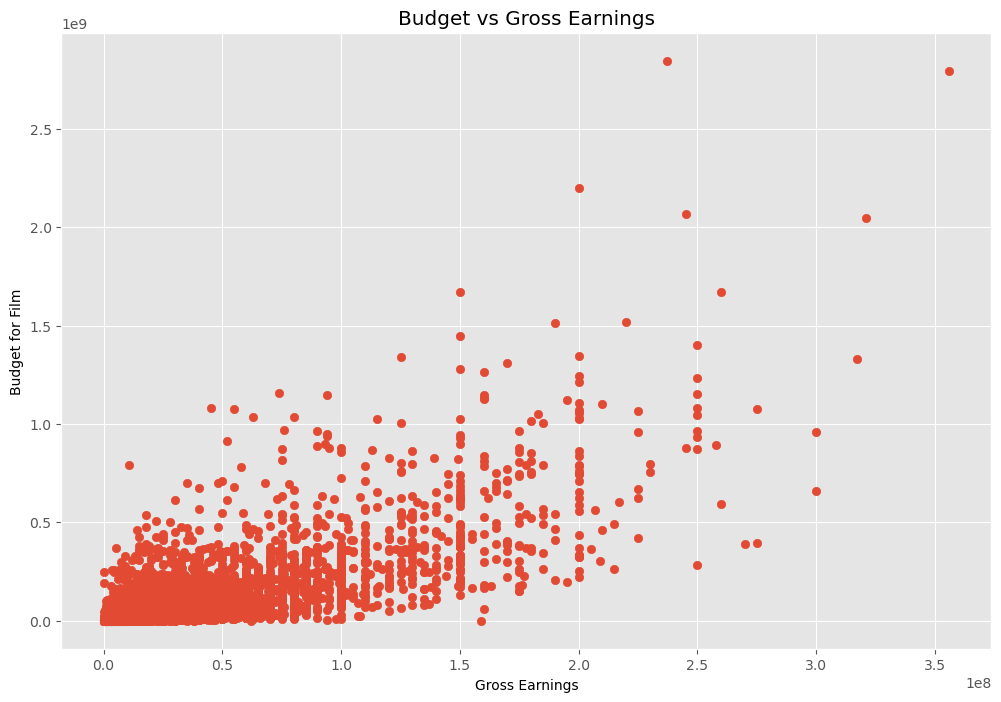

In [13]:
# scatter plot with budget vs gross


plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

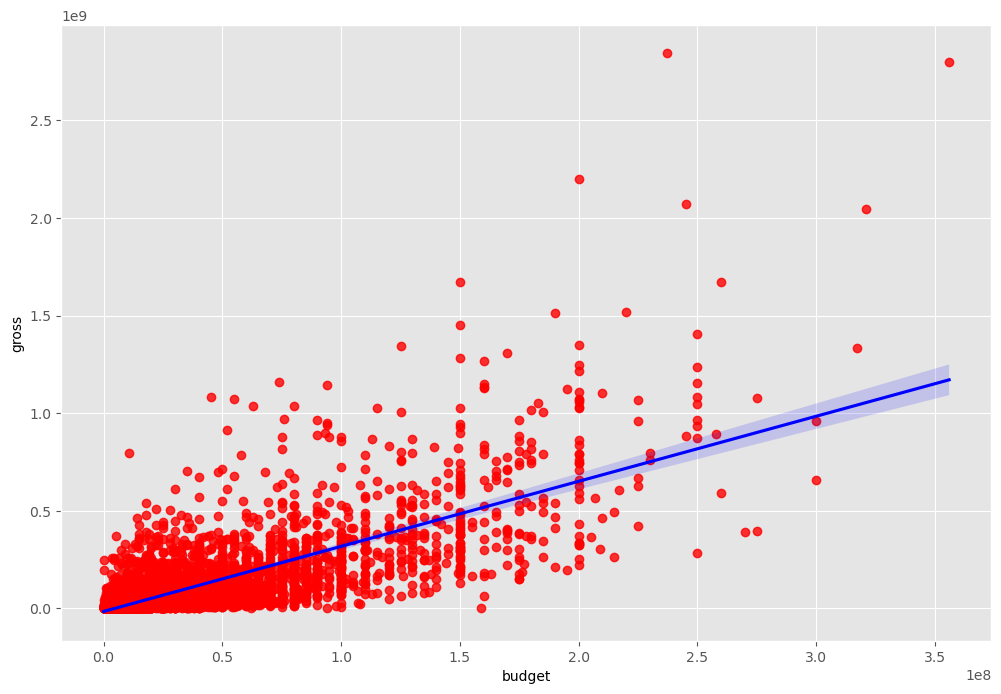

In [14]:
#  plot budget vs gross using seaborn

sns.regplot(x= 'budget',y= 'gross', data=df,scatter_kws={"color":"red"}, line_kws={'color': "blue"})


In [15]:
# Let's start looking at correlation
df.corr(numeric_only=True) # 3 methods are there pearson(bydefault),kendall, spearman

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

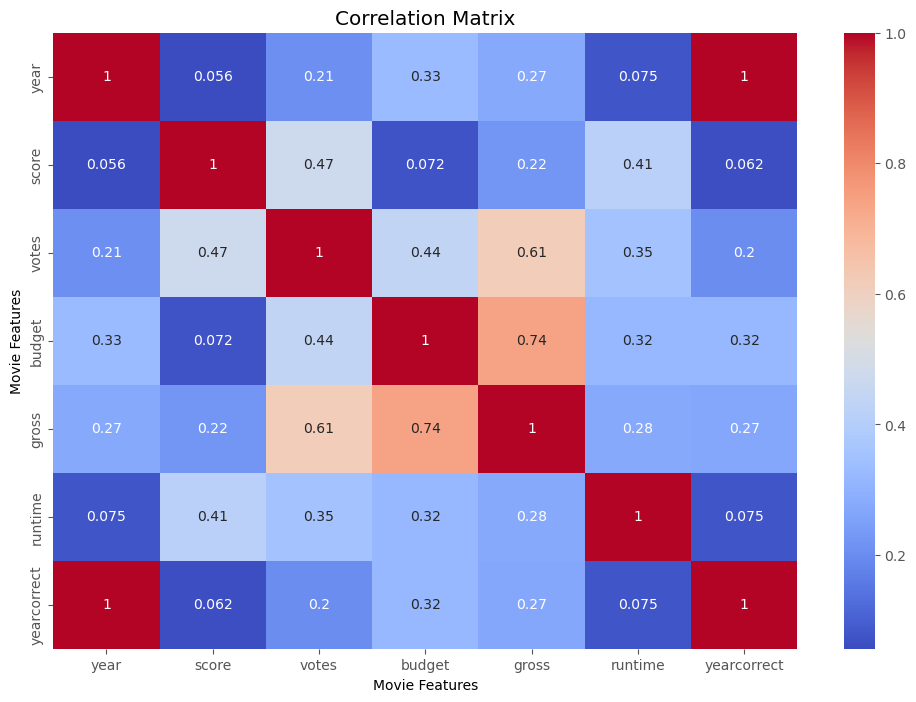

In [16]:
# Budget high correlation
correaltion_matrix = df.corr(numeric_only= True)

sns.heatmap(correaltion_matrix, annot= True,cmap='coolwarm')
plt.title('Correlation Matrix')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show

Text(120.72222222222221, 0.5, 'Gross')

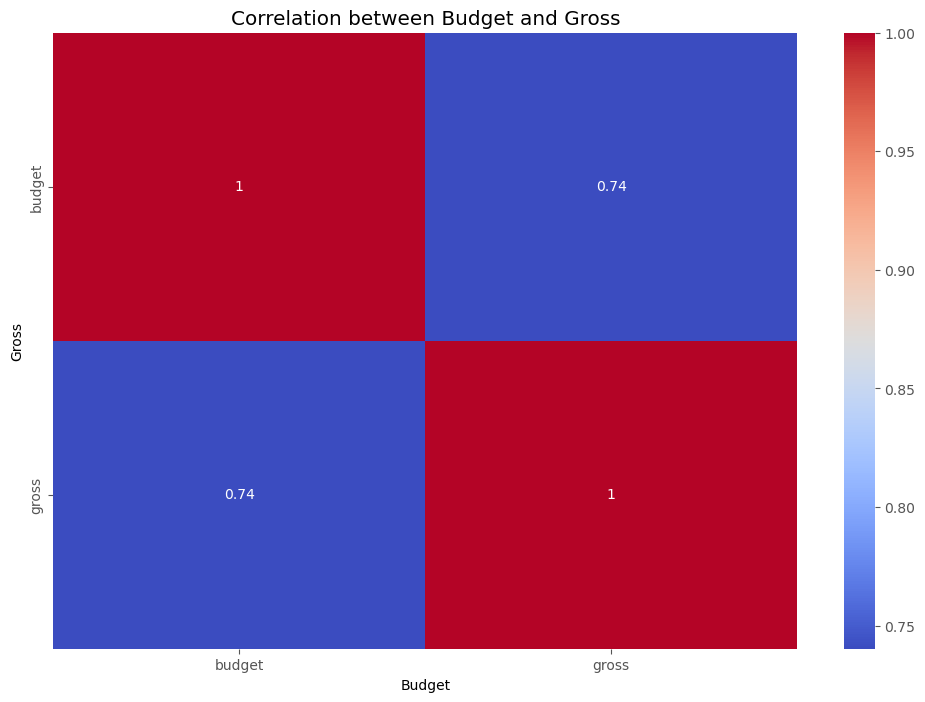

In [17]:
# Compute the Pearson correlation coefficient between 'budget' and 'gross'
correlation = df['budget'].corr(df['gross'])

# Create a heatmap of the correlation matrix
corr_matrix = df[['budget', 'gross']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Add title and labels
plt.title('Correlation between Budget and Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')

In [18]:
#Performing ANOVA analysis

# Subset the relevant columns for the ANOVA analysis
data = df[['genre','score']]

# Perform the ANOVA
groups = data.groupby('genre').groups
anova_results = f_oneway(*[data['score'][idx]for _,idx in groups.items()])

# Extract the ANOVA stats
f_value= anova_results[0]
p_value= anova_results[1]

# Print the ANOVA stats
print("ANOVA Results:")
print("F-value:", f_value)
print("p-value:", p_value)

ANOVA Results:
F-value: 41.55437720021484
p-value: 4.887317470308891e-109


The F-value represents the ratio of the between-group variability to the within-group variability. In this case, a larger F-value suggests a higher likelihood of significant differences among the groups.

The p-value represents the probability of observing the obtained F-value (or a more extreme value) if there were no significant differences among the groups.

The very small p-value (4.887317470308891e-109) indicates strong evidence against the null hypothesis of no significant differences among the groups.

There is a statistically significant difference in the 'score' variable across the different 'genre' groups. This suggests that the 'genre' of movie may hav an impact on its 'score'.

In [19]:
#conducting post-hoc tests(Tukey's test or Bonferroni correction)

In [20]:
# creating a model for the ANOVA

model = ols('score ~ genre', data = df).fit()

# Performing Tukey's test for pairwise comparison

tukey_results = sm.stats.multicomp.pairwise_tukeyhsd(df['score'], df['genre'])

#printing the result

print(tukey_results.summary())

C:\Users\vikas\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
   Action Adventure   0.0208    1.0 -0.1698  0.2115  False
   Action Animation   0.4433    0.0  0.2391  0.6474   True
   Action Biography   0.8408    0.0  0.6461  1.0354   True
   Action    Comedy  -0.0566 0.9428 -0.1719  0.0586  False
   Action     Crime   0.4419    0.0  0.2657   0.618   True
   Action     Drama   0.4741    0.0  0.3399  0.6083   True
   Action    Family   0.4277 0.9998 -1.1284  1.9837  False
   Action   Fantasy  -0.1986 0.9899 -0.6909  0.2937  False
   Action    Horror  -0.4199    0.0 -0.6327  -0.207   True
   Action   Mystery   0.4232 0.8566  -0.335  1.1815  False
   Action   Romance   0.3327    1.0 -1.0596  1.7249  False
   Action    Sci-Fi   0.1027    1.0 -1.1687   1.374  False
   Action  Thriller  -0.3188 0.9999 -1.4963  0.8587  False
   Action   Western  -0.2973    1.0 -2.4963  1.9016  Fal

There are multiple comparisons between different genres, such as Action, Adventure, Animation, Biography, Comedy, Crime, Drama, Family, Fantasy, Horror, Mystery, Romance, Sci-Fi, Thriller, and Western. The "reject" column indicates whether there is a statistically significant difference in means between the groups being compared. If "reject" is True, it suggests that there is a significant difference, while False suggests no significant difference.